# Converting .wav files to Spectrograms
****

Using techniques from DavidS's notebook at https://www.kaggle.com/davids1992/speech-representation-and-data-exploration/notebook we will be converting the wav files into spectrograms.

We also note that the train/validation split is explained in a txt file.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile


import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft

%matplotlib inline

Our first step is to describe the file path. I will try to keep this repo the same on other machines so this notebook functions normally.

In [2]:
audio_path = 'train/audio/'
specs_path = 'specs/train/'
csv_path = 'csv/train/'
csv_full_path = 'csv_full/train/'
#specs_vali_path = 'specs/vali/'
test_specs_path = 'specs/test/'
test_audio_path = 'test/audio/'
test_csv_path = 'csv/test/'
test_csv_full = 'csv_full/test/'
samples = []

# Here import the train/valid txt file and convert it to an array of file names
# Use the validation txt file.

text_file = open("train/validation_list.txt", "r")
Vali_list = text_file.read().split('\n')
Vali_list[:5]

['bed/026290a7_nohash_0.wav',
 'bed/060cd039_nohash_0.wav',
 'bed/060cd039_nohash_1.wav',
 'bed/099d52ad_nohash_0.wav',
 'bed/0e17f595_nohash_0.wav']

In [3]:
if not os.path.exists(specs_path):
    os.makedirs(specs_path)

if not os.path.exists(test_specs_path):
    os.makedirs(test_specs_path)
    
#if not os.path.exists(specs_vali_path):
    #os.makedirs(specs_vali_path)
    
if not os.path.exists(test_csv_path):
    os.makedirs(test_csv_path)
    
if not os.path.exists(csv_path):
    os.makedirs(csv_path)
    
if not os.path.exists(csv_full_path):
    os.makedirs(csv_full_path)


subFolderList = []
for x in os.listdir(audio_path):
    if os.path.isdir(audio_path + '/' + x):
        subFolderList.append(x)
        if not os.path.exists(specs_path + '/' + x):
            os.makedirs(specs_path +'/'+ x)
        #if not os.path.exists(specs_vali_path + '/' + x):
            #os.makedirs(specs_vali_path +'/'+ x)
        if not os.path.exists(csv_path + '/' + x):
            os.makedirs(csv_path +'/'+ x)
        if not os.path.exists(csv_full_path + '/' + x):
            os.makedirs(csv_full_path +'/'+ x)

The following cell may not be necessary

In [4]:
sample_audio = []
total = 0
for x in subFolderList:
    
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    total += len(all_files)
    # collect the first file from each dir
    sample_audio.append(audio_path  + x + '/'+ all_files[0])
    
    # show file counts
    print('count: %d : %s' % (len(all_files), x ))
print(total)

print(sample_audio[0])

count: 2367 : right
count: 2352 : eight
count: 1733 : cat
count: 1733 : tree
count: 1713 : bed
count: 1742 : happy
count: 2372 : go
count: 1746 : dog
count: 2375 : no
count: 1745 : wow
count: 2364 : nine
count: 2353 : left
count: 2380 : stop
count: 2356 : three
count: 6 : _background_noise_
count: 1734 : sheila
count: 2370 : one
count: 1731 : bird
count: 2376 : zero
count: 2377 : seven
count: 2375 : up
count: 1746 : marvin
count: 2373 : two
count: 1750 : house
count: 2359 : down
count: 2369 : six
count: 2377 : yes
count: 2367 : on
count: 2357 : five
count: 2357 : off
count: 2372 : four
64727
train/audio/right/988e2f9a_nohash_0.wav


## Spectrum Conversions

****

Here we will used DavidS's function to convert a wav file to a spectrogram

In [5]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)

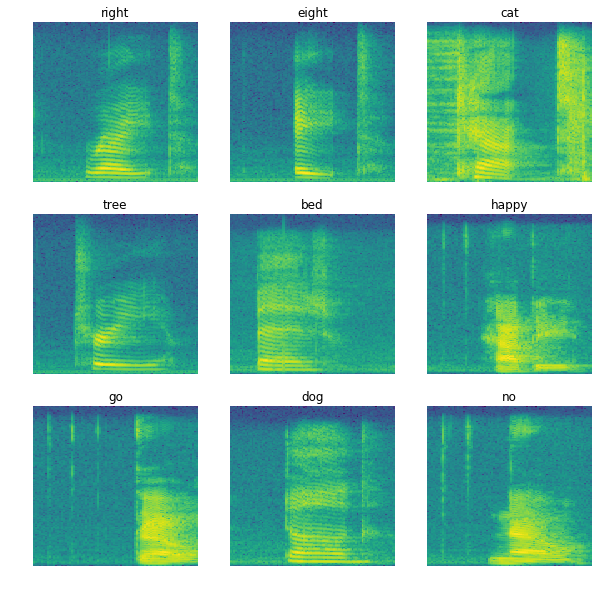

In [6]:
fig = plt.figure(figsize=(10,10))

# for each of the samples
for i, filepath in enumerate(sample_audio[:9]):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    label = filepath.split('/')[-2]
    plt.title(label)
    
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    _, spectrogram = log_specgram(test_sound, samplerate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')


### Data Conversion
****
Here we will convert our whole dataset/.

In [7]:
def wav2img(wav_path, targetdir='', figsize=(4,4)):
    """
    takes in wave file path
    and the fig size. Default 4,4 will make images 288 x 288
    """
    from matplotlib.pyplot import cm
    fig = plt.figure(figsize=figsize, frameon=False)
    #plt.gray() # Is there a better way to deal with colour?
    
    
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(wav_path)
    if test_sound.shape[0] == 16000: # Here I'm only taking files that are precisely 1 second
        _, spectrogram = log_specgram(test_sound, samplerate)
    
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        #plt.imshow(spectrogram.T, aspect='auto', origin='lower')
        plt.imsave('%s.png' % output_file, spectrogram, cmap='binary')
        #plt.savefig('%s.png' % output_file, dpi = 288)
    # Maybe add a method for padding files that are smaller than 1 second
    #elif test_sound.shape[0] < 16000:
        #pad with zeros
        
    plt.close()

In [8]:
def wav2mat(wav_path, targetdir=''):
    from matplotlib.pyplot import cm
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(wav_path)
    if test_sound.shape[0] == 16000: # Here I'm only taking files that are at most 1 second
        _, spec = log_specgram(test_sound, samplerate)
        spec = (spec - spec.min())/(spec.max() - spec.min())
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        np.savetxt(output_file, spec.T.flatten(), delimiter=",")
    # Maybe add a method for padding files that are smaller than 1 second
    #elif test_sound.shape[0] < 16000:
        #pad with zeros
        
    plt.close()

In [9]:
shape_int = 0
all_files_shape = [audio_path + 'yes/' + y for y in os.listdir(audio_path + 'yes/') if '.wav' in y]
while shape_int < 16000:
    i=0
    shape_rate, shape_sound = wavfile.read(all_files_shape[i])
    if shape_sound.shape[0] == 16000: # Here I'm only taking files that are at most 1 second
        _, spec = log_specgram(test_sound, samplerate)
        shape = spec.shape
    else:
        i = i+1
    shape_int = shape_sound.shape[0]
print(shape)

(87, 161)


In [16]:
def wav2mat_pad(wav_path, targetdir=''):
    from matplotlib.pyplot import cm
    # use soundfile library to read in the wave files
    samplerate, test_sound  = wavfile.read(wav_path)
    if test_sound.shape[0] == 16000: # Here I'm only taking files that are at most 1 second
        _, spec = log_specgram(test_sound, samplerate)
        spec = (spec - spec.min())/(spec.max() - spec.min())
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        np.savetxt(output_file, spec.T.flatten(), delimiter=",")
    elif test_sound.shape[0] < 16000:
        _, spec = log_specgram(test_sound, samplerate)
        spec = (spec - spec.min())/(spec.max() - spec.min())
        shape = (99,161)
        return_spec = np.zeros(shape)
        return_spec[:spec.shape[0],:spec.shape[1]] = spec
    ## create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        np.savetxt(output_file, return_spec.T.flatten(), delimiter=",")
        
    plt.close()

Convert Training Data

In [17]:
for i, x in enumerate(subFolderList):
    print(i, ':', x)
    # get all the wave files
    all_files = [y for y in os.listdir(audio_path + x) if '.wav' in y]
    for file in all_files:
        wav2mat_pad(audio_path + x + '/' + file, csv_full_path + x)

0 : right
1 : eight
2 : cat
3 : tree
4 : bed
5 : happy
6 : go
7 : dog
8 : no
9 : wow
10 : nine
11 : left
12 : stop
13 : three
14 : _background_noise_
15 : sheila


/Users/Eric/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


16 : one
17 : bird


/Users/Eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


18 : zero
19 : seven
20 : up
21 : marvin
22 : two
23 : house
24 : down
25 : six
26 : yes
27 : on
28 : five
29 : off
30 : four


Convert Testing Data

In [10]:
all_files = [y for y in os.listdir(test_audio_path) if '.wav' in y]
for file in all_files:
    wav2mat_pad(test_audio_path + '/' + file, test_csv_path)

/Users/Eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
